In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab05.ipynb")

# E7: Lab Assignment 05 - Number Representation & Exceptions

You must submit the lab to Gradescope by the due date. You will submit the zip file produced by running the final cell of the assignment.


## Instructions

**Run the first cell, Initialize Otter**, to import the autograder and submission exporter.

Throughout the assignment, replace `...` with your answers. We use `...` as a placeholder and these should be deleted and replaced with your answers.

Any part listed as a "<font color='red'>**Question**</font>" should be answered to receive credit.

**Please save your work after every question!**

To read the documentation on a Python function, you can type `help()` and add the function name between parentheses.

## Score Breakdown
Question   | Points
:---       | --:
1.0 – 1.5  | 7
2.0 – 2.1  | 8
3.0 – 3.1  | 10
Total      | 25

**Run the cell below**, to import the required modules.

In [2]:
# Please run this cell, and do not modify the contents
import numpy as np
import math
import heapq
import time
import matplotlib.pyplot as plt
import random
from random import choice
from string import ascii_lowercase
from timeit import default_timer as timer
import inspect
np.seterr(all='ignore');

import hashlib
def get_hash(num):
    """Helper function for assessing correctness"""
    return hashlib.md5(str(num).encode()).hexdigest()

## Question 1: Fibonacci Sequence

The Fibonacci Sequence can be defined by the recursive relationship $F_n = F_{n-1}+F_{n-2}$, where the first two numbers of the sequence by convention are $F_0 = 0$ and $F_1 = 1$. For any non-negative integer $n$, we can difine the Fibonacci sequence as:

\begin{equation}
F_n = \begin{cases}
    0 &\text{if $n=0$}\\
    1 &\text{if $n=1$}\\
    F_{n-1} + F_{n-2} & \text{if $n\geq2$}\\
    \end{cases}
\end{equation}

### Question 1.0

Using **recursion**, write a function `FibRec(n)` which returns:
* the $n^{th}$ number in the Fibonacci sequence, $F_n$ if `n` is a non-negative integer
* "n must be a non-negative integer" if `n` is not a valid input

Be careful with your string formatting for invalid input `n`. Any small modification, such as extra space or character, will result in a failed test.

Test your `FibRec()` function for `n = 18`. Assign the output to `q1_0`. Feel free to try it for other inputs.

```
Examples:

>>> FibRec(12)
144

>>> FibRec(23)
28657

>>> FibRec(2.2)
'n must be an integer'

>>> FibRec(-10)
'n must be positive'

>>> FibRec(-10.1)
'n must be a positive integer'

>>> FibRec(10.0)
55
```

In [3]:
# ANSWER CELL
# BEGIN SOLUTION
def FibRec(n):
    if n < 0 and not isinstance(n, int):
        return 'n must be a positive integer'
    elif not isinstance(n, int):
        return 'n must be an integer'
    elif n < 0:
        return 'n must be positive'
    elif n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return FibRec(n-1) + FibRec(n-2)
# END SOLUTION

In [4]:
# TEST YOUR FUNCTION HERE
q1_0 = FibRec(-18.10) # SOLUTION

print(f'F(n) = {q1_0}')

F(n) = n must be a positive integer


In [5]:
grader.check("q1.0")

q1.0 results: All test cases passed!

### Question 1.1

The ratio $r = \dfrac{F_n}{F_{n-1}}$ of consecutive Fibonacci numbers converges to a limit called the Golden Ratio. 

Create a function `simpleFibRatio(n)` that returns `r`, where `r` is the ratio defined above for the values of the Fibonacci Sequence defined by `n`. Use the function `FibRec(n)` from Question 1.0 to calculate the ratio. **Do not** handle any exceptions in this case.

Test your `simpleFibRatio()` function for `n = 18` in the following cell. Assign the output to `q1_1`. Feel free to try it for other inputs. You should observe that for $n>10$, the ratio converges to approximately 1.618, which is the Golden Ratio.

```
Examples:

>>> simpleFibRatio(2)
1.0

>>> simpleFibRatio(3)
2.0

>>> simpleFibRatio(4)
1.5

>>> simpleFibRatio(20)
1.6180339631667064
```

In [6]:
# ANSWER CELL
# BEGIN SOLUTION
def simpleFibRatio(n):
    return FibRec(n)/FibRec(n-1)
# END SOLUTION

In [7]:
# TEST YOUR FUNCTION HERE
q1_1 = simpleFibRatio(18) # SOLUTION

print(f'r = {q1_1}')

r = 1.6180338134001253


In [8]:
grader.check("q1.1")

q1.1 results: All test cases passed!

### Question 1.2
What error type is raised if you try to run `simpleFibRatio(n=1)`? Assign your answer to the variable `q1_2` as a string.

**A.** `ValueError` \
**B.** `IndexError` \
**C.** `KeyError` \
**D.** `ZeroDivisionError` \
**E.** `NameError` \
**F.** `RecursionError` \
**G.** `TypeError` 

Your answer should be a string, e.g., `"A"`, `"B"`, etc.\
Remember to put quotes around your answer choice.

**Note that the test for this question will be a hidden test. Meaning, you will NOT be able to know whether your answer is correct or not by running the `grader.check()` cell.**

In [9]:
# TEST YOUR FUNCTION HERE
# After getting the error, comment out the expression to avoid interrupting the notebook when running all cells


In [10]:
# ANSWER CELL
q1_2 = 'D' # SOLUTION

q1_2

'D'

In [11]:
grader.check("q1.2")

q1.2 results: All test cases passed!
q1.2 - 1 message: Correct answer format. Note that the actual test is hidden.

### Question 1.3

Create a new function called `midFibRatio(n)` that returns `r` from `simpleFibRatio()` if no error occurs, but returns `np.nan` for the error raised by `simpleFibRatio(n=1)` (error from Question 1.2).

Test your `midFibRatio()` function for `n = 18` and then `n = 1`. Assign the output to `q1_3`. Feel free to try it for other inputs.

```
Examples:

>>> midFibRatio(2)
1.0

>>> midFibRatio(3)
2.0

>>> midFibRatio(4)
1.5

>>> midFibRatio(20)
1.6180339631667064

>>> midFibRatio(1)
nan

>>> a = midFibRatio(1) # make sure that you are using return rather than print
>>> a
nan
```

In [12]:
# ANSWER CELL
# BEGIN SOLUTION NO PROMPT
def midFibRatio(n):
    try:
        r = simpleFibRatio(n)
    except ZeroDivisionError:
        r = np.nan
    return r
# END SOLUTION
""" # BEGIN PROMPT
def midFibRatio(n):
    try:
        ...
    except ...
        ...
    return r
""" # END PROMPT

' # BEGIN PROMPT\ndef midFibRatio(n):\n    try:\n        ...\n    except ...\n        ...\n    return r\n'

In [13]:
# TEST YOUR FUNCTION HERE
q1_3 = midFibRatio(1) # SOLUTION

print(f'r = {q1_3}')

r = nan


In [14]:
grader.check("q1.3")

q1.3 results: All test cases passed!

### Question 1.4
What error type is raised if you try to run `simpleFibRatio(n=3.5)` or for any value less than 1? All these inputs should have the same error type. Assign your answer to the variable `q1_4` as a string.

**A.** `ValueError` \
**B.** `IndexError` \
**C.** `KeyError` \
**D.** `ZeroDivisionError` \
**E.** `NameError` \
**F.** `RecursionError` \
**G.** `TypeError` 

Your answer should be a string, e.g., `"A"`, `"B"`, etc.\
Remember to put quotes around your answer choice.

**Note that the test for this question will be a hidden test. Meaning, you will NOT be able to know whether your answer is correct or not by running the `grader.check()` cell.**

In [15]:
# TEST YOUR FUNCTION HERE
# After getting the error, comment out the expression to avoid interrupting the notebook when running all cells


In [16]:
# ANSWER CELL
q1_4 = 'G' # SOLUTION

q1_4

'G'

In [17]:
grader.check("q1.4")

q1.4 results: All test cases passed!
q1.4 - 1 message: Correct answer format. Note that the actual test is hidden.

### Question 1.5
Create a new function called `finalFibRatio(n)` that returns:
1. `r` from `simpleFibRatio()` if no error occurs
2. `np.nan` for the error raised by `simpleFibRatio(n=1)`
3. `-999` for the error raised by inputting a non-positive or a fractional number (error from Question 1.4)

Test your `finalFibRatio()` function for`n = 18`, `n = 1`, and `n = -2`. Assign the output to `q1_5`. Feel free to try it for other inputs.

```
Examples:

>>> finalFibRatio(2)
1.0

>>> finalFibRatio(3)
2.0

>>> finalFibRatio(4)
1.5

>>> finalFibRatio(20)
1.6180339631667064

>>> finalFibRatio(1)
nan

>>> finalFibRatio(3.5)
-999

>>> finalFibRatio(-1)
-999
```

In [18]:
# ANSWER CELL
# BEGIN SOLUTION
def finalFibRatio(n):
    try:
        r = simpleFibRatio(n)
    except TypeError:
        r = -999
    except ZeroDivisionError:
        r = np.nan
    return r
# END SOLUTION

In [19]:
# TEST YOUR FUNCTION HERE
q1_5 = finalFibRatio(-2) # SOLUTION

print(f'r = {q1_5}')

r = -999


In [20]:
grader.check("q1.5")

q1.5 results: All test cases passed!

## Question 2: Binary Representations of Integers

There are many ways to represent integers in binary format (i.e. with only zeros and ones). In this problem, we only consider 8-bit representations: each integer will be represented in binary format by a sequence of 8 zeros and/or ones. You will implement three different binary representations for integers: 
1. unsigned representation
2. signed-magnitude representation
3. two's complement representation

In the **unsigned representation**, each bit represents a power of 2, from $2^0$ (right-most bit) to $2^7$ (left-most bit). For example, the binary representation 00100100 represents the integer $2^5 + 2^2 = 36$, and the binary representation 11101000 represents the integer $2^7+2^6+2^5+2^3 = 232$. Note that negative integers cannot be represented with the unsigned representation.

In the **signed-magnitude representation**, the left-most bit represents the sign of the integer. If the left-most bit is 0, then the integer is positive. If the left-most bit is 1, then the integer is negative. The other bits represent the magnitude of the integer, each bit representing a power of 2, from $2^0$ (right-most bit) to $2^6$ (seventh bit from the right). For example, the binary representation 00100100 still represents the number $2^5 + 2^2 = 36$, while the binary representation 11101000 now represents the number $-\left(2^6 + 2^5 + 2^3\right) = -104$. Theoretically, there are two possible binary representations of zero (00000000 and 10000000). However, since there is no negative zero (10000000) and positive zero (00000000), the binary number 10000000 is used to represent -128, whereas 00000000 represents 0.

In the **two's complement representation**, the left-most bit represents $-2^7$ if it is 1, and 0 if it is 0. The other seven bits are used in the same way as in the unsigned and
signed-magnitude representations. For example, the binary representation 00100100 still represents the number 36, while the binary representation 11101000 now represents the
number $-2^7 + 2^6 + 2^5 + 2^3 = -24$.

### Question 2.0

Write a function `Binary2Num(binary, representation)` that takes two inputs:
1. `binary`, which is string of length 8 made of only zeros and ones 
2. `representation`, which is a string that indicates the name of the representation 

The function should return the base-10 number corresponding to `binary` based on the number representation specified in `representation`.

You are not allowed to use any built-in function that converts from binary to decimal.

Constraints:
* `binary` should be a string of length 8 made of only zeros and ones. Otherwise, your function **should return** "binary should be a string of length 8 made of only 0 and 1".
* `representation` should be a string and can take one of the three following values: 'UnSign', 'Sign' and 'TC', which correspond to unsigned, signed-magnitude, and two's complement representations, respectively. Otherwise, your function **should return** "invalid representation".
* Your function should check `binary` first and then `representation` for valid inputs
* Be careful with your string formatting for invalid inputs. Any small modification, such as extra space or character, will result in a failed test.

Test your `Binary2Num()` function for `binary = '11001000'` and `representation = 'TC'`. Assign the output to `q2_0`. Feel free to try it for other inputs.


```
Examples:

>>> Binary2Num('11001000', 'UnSign')
200

>>> Binary2Num('11001000', 'Sign')
-72

>>> Binary2Num('11001000', 'TC')
-56

>>> Binary2Num('01001110', 'UnSign')
78

>>> Binary2Num('11001110', 'Sign')
-78

>>> Binary2Num('11001110', 'TC')
-50

>>> Binary2Num('1100111011001110', 'UnSign') # More than 8 bits
'binary should be a string of length 8 made of only 0 and 1'

>>> Binary2Num('110010ab', 'UnSign') # bits include characters other than 0 and 1
'binary should be a string of length 8 made of only 0 and 1'

>>> Binary2Num('11001000', 'unsigned') # representation should be 'UnSign'
'invalid representation'

>>> Binary2Num('11001000', 'unsign') # strings are case-sensitive
'invalid representation'
```

In [21]:
# ANSWER CELL
# BEGIN SOLUTION
def Binary2Num(binary, representation):
    
    # check binary
    if type(binary) != str or len(binary) != 8 or not all(i in '01' for i in binary):
        return 'binary should be a string of length 8 made of only 0 and 1'
    
    # check representation
    if representation not in ['UnSign', 'Sign', 'TC']:
        return 'invalid representation'        
    
    # Initialize result
    result = 0

    if representation == 'UnSign':
        for i in range(0, len(binary)):
            if binary[i] == '1':
                result += 2**(7-i)

    elif representation == 'Sign':
        if binary == '10000000':
            result = -128
        else:
            sign = 1
            if binary[0] == '1':
                sign = -1
            for i in range(1, len(binary)):
                if binary[i] == '1':
                    result += 2**(7-i)
            result *= sign

    elif representation == 'TC':
        if binary[0] == '1':
            result = result - 2**7
        for i in range(1, len(binary)):
            if binary[i] == '1':
                result += 2**(7-i)
    
    return result
# END SOLUTION

In [22]:
# TEST YOUR FUNCTION HERE
q2_0 = Binary2Num('10000001', 'TC') # SOLUTION

print(f'Decimal representation of the number: {q2_0}')

Decimal representation of the number: -127


In [23]:
grader.check("q2.0")

q2.0 results: All test cases passed!

### Question 2.1

Write a function `BinaryComplement(binary, representation)` that takes two inputs:
1. `binary`, which is string of length 8 made of only zeros and ones 
2. `representation`, which is a string that indicates the name of the representation 

The function should return the base-10 number corresponding to the **complement** of `binary` based on the number representation specified in `representation`.

The complement strategy here is to flip the bits of the original number's binary representation. For example:
* if `binary = 11111111`, its binary complement would be `complement = 00000000`
* if `binary = 11111110`, its binary complement would be `complement = 00000001`
* if `binary = 10101010`, its binary complement would be `complement = 01010101`

Note that your function should return the base-10 number corresponding to the complement, and not the binary representation of the complement. 

For example if using `representation = UnSign`:
* if `binary = 11111111` $\rightarrow$ `complement = 00000000` $\rightarrow$ return 0
* if `binary = 11111110` $\rightarrow$ `complement = 00000001` $\rightarrow$ return 1
* if `binary = 10101010` $\rightarrow$ `complement = 01010101` $\rightarrow$ return 85

You are not allowed to use any built-in function that converts from binary to decimal.

Assume `binary` and `representation` are valid inputs (no need to check them and return a warning message). Use your function from Question 2.0 after you get the complement.

Test your `BinaryComplement()` function for `binary = '11001000'` and `representation = 'TC'`. Assign the output to `q2_1`. Feel free to try it for other inputs.


```
Examples:

>>> BinaryComplement('11001000', 'UnSign')
55

>>> BinaryComplement('11001000', 'Sign')
55

>>> BinaryComplement('11001000', 'TC')
55

>>> BinaryComplement('01001110', 'UnSign')
177

>>> BinaryComplement('11001110', 'Sign')
49

>>> BinaryComplement('11001110', 'TC')
49
```

In [24]:
# ANSWER CELL
# BEGIN SOLUTION
def BinaryComplement(binary, representation):
    
    complement = ''
    for c in binary:
        complement = complement + '0' if c == '1' else complement + '1'

    return Binary2Num(complement, representation)
# END SOLUTION

In [25]:
# TEST YOUR FUNCTION HERE
q2_1 = BinaryComplement('01001110', 'UnSign') # SOLUTION

print(f'Decimal representation of the complement: {q2_1}')

Decimal representation of the complement: 177


In [26]:
grader.check("q2.1")

q2.1 results: All test cases passed!

## Question 3: Floating Point Numbers

### Question 3.0

Write a function `CompareFloats(x, y, tol)` that takes as input two numbers `x` and `y` and a tolerance value (`tol`) and returns `exact` and `approx`, both of which are of type `bool`. `exact` should be `True` if and only if `x` is exactly equal to `y` in Python, and otherwise `False`. `approx` should be `True` if and only if the difference between `x` and `y` (in absolute value) is less than or equal to `tol` in Python, and otherwise `False`. In other words, the function's output argument `approx` indicates whether `x` and `y` are "approximately equal", where "approximately equal" is quantified by the input argument `tol`. 

The default value of `tol` should be $1\times10^{-9}$. 

The first returned object should be `exact` and the second returned object should be `approx`.

The returned parameters `exact` and `approx` should be of type `bool`.

You do not have to check that the inputs are valid.

Test your `CompareFloats()` function for `x = 1e-4`, `y = 1.5e-4`, and `tol = 5e-5`. Assign the output to `q3_0`. Feel free to try it for other inputs.

```
Examples:

>>> CompareFloats(2+3, 5, 0)
(True, True)

>>> CompareFloats(0, 0.001, 1e-2)
(False, True)

>>> CompareFloats(0, 0.001, 1e-4)
(False, False)

>>> CompareFloats(0, 0.001)
(False, False)
```

In [27]:
# ANSWER CELL
# BEGIN SOLUTION
def CompareFloats(x, y, tol=1e-9):
    
    exact = (x==y)
    approx = (abs(x-y)<=tol)
    
    return exact, approx
# END SOLUTION

In [28]:
# TEST YOUR FUNCTION HERE
q3_0 = CompareFloats(1e-4, 1.5e-4, 5e-5) # SOLUTION

print(f'The numbers are exactly equal: {q3_0[0]}')
print(f'The numbers are approximately equal: {q3_0[1]}')

The numbers are exactly equal: False
The numbers are approximately equal: True


In [29]:
grader.check("q3.0")

q3.0 results: All test cases passed!

### Question 3.1

There are multiple ways to represent floating point numbers in binary format. The Institute of Electrical and Electronics Engineers (IEEE) defined a standard (called IEEE-754) for representing floating point numbers in binary format. IEEE-754 specifies different formats, depending on how many bits (e.g. 16 bits, 32 bits, 64 bits, 128 bits) are used to represent each floating point number. The formats that use 32 bits and 64 bits to represent each number are commonly known as "single precision" and "double precision", respectively. 

In this problem, we only consider single precision representations, where each number is represented using 32 bits (i.e. a sequence of 32 zeros and/or ones). In the IEEE-754 standard, the number represented by a sequence of 32 bits can be calculated using the following formula:

$$x = (-1)^{\color{blue}s} \times 1.{\color{red}f} \times 2^{({\color{green}e}-bias)}$$

- $s$ is the value of the first bit
- $bias$ is equal to $127$ for single precision
- $e$ is the integer represented by the 8 bits corresponding to the exponent, using the unsigned 8-bit integer representation (see Question 2)
- $f$ is the fraction represented by the last 23 bits, where each bit represents a *negative* power of $2$, from $2^{-1}$ (first bit of the fraction from the left) to $2^{-23}$ (last bit)

Below is a visualization of where $s$, $e$, and $f$ are stored within the binary string:

<br>

<center><figure>
  <img src="https://docs.google.com/drawings/d/e/2PACX-1vSSZdTLRXoKavtLgSSGSW5AtrStxPn_EbjAr29RlSBd4CmcRhOixFL8lnav35QVN8PqsOxNvgJTTXSz/pub?w=1439&h=624" style="width:40%">
    <figcaption style="text-align:center"><strong>IEEE 754 Single Precision</strong></figcaption>   
</figure></center>

<br>

The equation $(-1)^{\color{blue}s} \times 1.{\color{red}f} \times 2^{({\color{green}e}-127)}$ applies only $\text{if} \; e \ne 0 \; \text{and} \; e \ne 255$. IEEE has reserved some values for special cases, as shown below:

$$\begin{align}
(-1)^{\color{blue}s} \times 0.{\color{red}f} \times 2^{-126} && \text{if} \; e = 0 \; \text{and} \; f \ne 0 \\
0 && \text{if} \; e = 0 \; \text{and} \; f = 0 \\
(-1)^s \times \infty && \text{if} \; e = 255 \; \text{and} \; f = 0 \\
NaN \;(\text{Not a Number}) && \text{if} \; e = 255 \; \text{and} \; f \ne 0
\end{align}$$


Write a function `Single2Decimal(binary)` that takes as input a character string of length 32 made of only zeros and ones (`binary`) and returns the floating point number (in base 10) that is represented by `binary` using the IEEE-754 32-bit single precision binary representation. 

Use `np.inf` as the infinite value and `np.nan` for quantities which are "not a number".

Test your `Single2Decimal()` function for `'01010101010101010101010101010101'`. Assign the output to `q3_1`. Feel free to try it for other inputs.

*Hint:* Use your function `Binary2Num()` to compute $e$.

```
Examples:

>>> Single2Decimal('00111111111100000000000000000000')
1.875

>>> Single2Decimal('10111111000000000000000000000000')
-0.5

>>> Single2Decimal('00100000100000000000000000000001')
2.1684046034649503e-19

>>> Single2Decimal('11111111100000000000000000000000')
-inf

>>> Single2Decimal('11111111100000000000000000000001')
nan

>>> Single2Decimal('10111111010000000000000000000000')
-0.75

>>> Single2Decimal('00100000100000000000111000000001')
2.1693310457510097e-19

```

In [30]:
# ANSWER CELL
# BEGIN SOLUTION
def Single2Decimal(binary):

    value_s = int(binary[0])
    value_d = 127
    value_e = Binary2Num(binary[1:9], 'UnSign')

    value_f = 0.
    
    for i in range(9,32):
        if binary[i] == '1':
            value_f = value_f + 2**(8-i)
            
    if not value_e == 0 and not value_e == 255:
        result = ((-1)**value_s)*(2**(value_e-value_d))*(1+value_f)
    elif value_e == 0 and not value_f == 0:
        result = ((-1)**value_s)*(2**(1-value_d))*value_f
    elif value_e == 0 and value_f == 0:
        result = 0
    elif value_e == 255 and value_f == 0:
        result = ((-1)**value_s)*np.inf
    else:
        result = np.nan

    return float(result)
# END SOLUTION

In [31]:
# TEST YOUR FUNCTION HERE
q3_1 = Single2Decimal('10111110000101010101110101100101') # SOLUTION

print(f'Decimal representation of the number: {q3_1}')

Decimal representation of the number: -0.1458640843629837


In [32]:
grader.check("q3.1")

q3.1 results: All test cases passed!

### You're done with this Lab!

**Important submission information:** After completing the assignment, click on the Save icon from the Tool Bar &nbsp;<i class="fa fa-save" style="font-size:16px;"></i>&nbsp;. After saving your notebook, **run the cell with** `grader.check_all()` and confirm that you pass the same tests as in the notebook. Then, **run the final cell** `grader.export()` and click the link to download the zip file. Then, go to Gradescope and submit the zip file to the corresponding assignment. 

**Once you have submitted, stay on the Gradescope page to confirm that you pass the same tests as in the notebook.**

Congrats on finishing this lab!


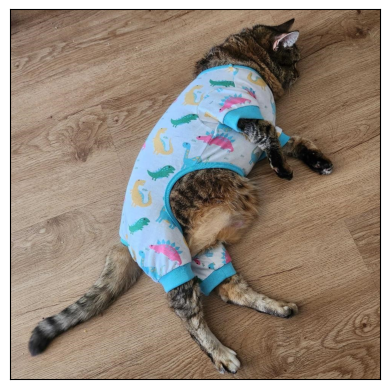

In [33]:
import matplotlib.image as mpimg
img = mpimg.imread('resources/animal.jpg')
imgplot = plt.imshow(img)
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)
print("Congrats on finishing this lab!")
plt.show()

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [34]:
grader.check_all()

q1.0 results: All test cases passed!

q1.1 results: All test cases passed!

q1.2 results: All test cases passed!
q1.2 - 1 message: Correct answer format. Note that the actual test is hidden.

q1.3 results: All test cases passed!

q1.4 results: All test cases passed!
q1.4 - 1 message: Correct answer format. Note that the actual test is hidden.

q1.5 results: All test cases passed!

q2.0 results: All test cases passed!

q2.1 results: All test cases passed!

q3.0 results: All test cases passed!

q3.1 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)